In [1]:
import os
import pickle
import re
import sys
sys.path.append(os.path.abspath('') + '/../../..')
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from matplotlib.ticker import MultipleLocator
import matplotlib.font_manager as font_manager

matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42
font = {'family' : 'sans-serif',
        'weight' : 'normal',
        'size'   : 9}
matplotlib.rc('font', **font)
plt.rc('axes', labelsize=9)
plt.rc('axes', titlesize=9)

from utils.functions.control import get_task_name

In [2]:
def plot(list):

    fig, axs = plt.subplots(2,4, dpi=300)

    for i in range(len(list)):
        
        task, nb_gens, ylims, yticks, sb3_dict = list[i]

        axs[i%2][i//2].set_title(
            get_task_name(task)[:-3], fontdict={'fontweight': 'bold'})

        gens = [1] + np.arange(nb_gens//100, nb_gens+1, nb_gens//100).tolist()
        path = '../../../../../Videos/envs.multistep.imitate.control/'
        path += 'merge.no~steps.0~task.' + task + '~transfer.no/'
        path += 'bots.network.static.rnn.control/64/'

        scores = {}

        scores[64] = np.zeros( len(gens) ) * np.nan
        scores['64 (elite)'] = np.zeros( len(gens) ) * np.nan

        for gen in gens:
            scores[64][gens.index(gen)] = \
                np.load(path + str(gen) + '/scores.npy').mean()
            scores['64 (elite)'][gens.index(gen)] = \
                np.load(path + str(gen) + '/scores.npy').mean(axis=1).max()

        if i in [1, 3, 5, 7]:
            axs[i%2][i//2].set_xlabel('# Generations')
        if i in [0, 1]:
            axs[i%2][i//2].set_ylabel("Mean Score")

        if nb_gens >= 1000:
            xticks = 1000
        else:
            xticks = 100

        axs[i%2][i//2].set_xticks(np.arange(0, nb_gens+1, step=xticks))
        axs[i%2][i//2].set_yticks(
            np.arange(yticks[0], yticks[1]+1, step=yticks[2]))
        axs[i%2][i//2].set_xlim(
            [-nb_gens//50+(xticks>=1000),nb_gens+nb_gens//50-(xticks>=1000)])
        axs[i%2][i//2].set_ylim([ylims[0],ylims[1]])

        sorted_sb3_dict = {k: v for k, v in sorted(sb3_dict.items(),
            key=lambda item: item[1])}
        sb3 = []

        for key in sorted_sb3_dict:

            if 'dqn' in key:
                sb3.append(axs[i%2][i//2].hlines(sorted_sb3_dict[key],
                    -nb_gens//100, nb_gens+nb_gens//100, linestyles='dotted',
                    colors='red', label=key))
            elif 'ppo' in key:
                sb3.append(axs[i%2][i//2].hlines(sorted_sb3_dict[key],
                    -nb_gens//100, nb_gens+nb_gens//100, linestyles='dotted',
                    colors='peru', label=key))
            elif 'sac' in key:
                sb3.append(axs[i%2][i//2].hlines(sorted_sb3_dict[key],
                    -nb_gens//100, nb_gens+nb_gens//100, linestyles='dotted',
                    colors='darkviolet', label=key))
            elif 'td3' in key:
                sb3.append(axs[i%2][i//2].hlines(sorted_sb3_dict[key],
                    -nb_gens//100, nb_gens+nb_gens//100, linestyles='dotted',
                    colors='pink', label=key))
            elif 'tqc' in key:
                sb3.append(axs[i%2][i//2].hlines(sorted_sb3_dict[key],
                    -nb_gens//100, nb_gens+nb_gens//100, linestyles='dotted',
                    colors='seagreen', label=key))
        
        sb3.reverse()

        ne = []
        ne.append(axs[i%2][i//2].plot(
            gens, scores[64], '.-', c='darkgrey', label='64')[0])
        ne.append(axs[i%2][i//2].plot(
            gens, scores['64 (elite)'], '.-', c='royalblue',
            label='64 (elite)')[0])

        ne.reverse()

        if i == 6:

                leg1 = axs[i%2][i//2].legend(
                    handles=ne, title="Population size", loc='lower right',
                    edgecolor='palegoldenrod', labelspacing=0.2)
                leg1.get_frame().set_alpha(None)
                leg1.get_frame().set_facecolor((1, 1, 1, .45))
                axs[i%2][i//2].add_artist(leg1)

        if i == 1:

            font = font_manager.FontProperties(family='monospace')

            leg2 = axs[i%2][i//2].legend(handles=sb3, loc='lower right',
                edgecolor='palegoldenrod', labelspacing=0, prop=font)
            leg2.get_frame().set_alpha(None)
            leg2.get_frame().set_facecolor((1, 1, 1, .45))

        axs[i%2][i//2].xaxis.set_minor_locator(MultipleLocator(100))

    fig.tight_layout(pad=0.5)

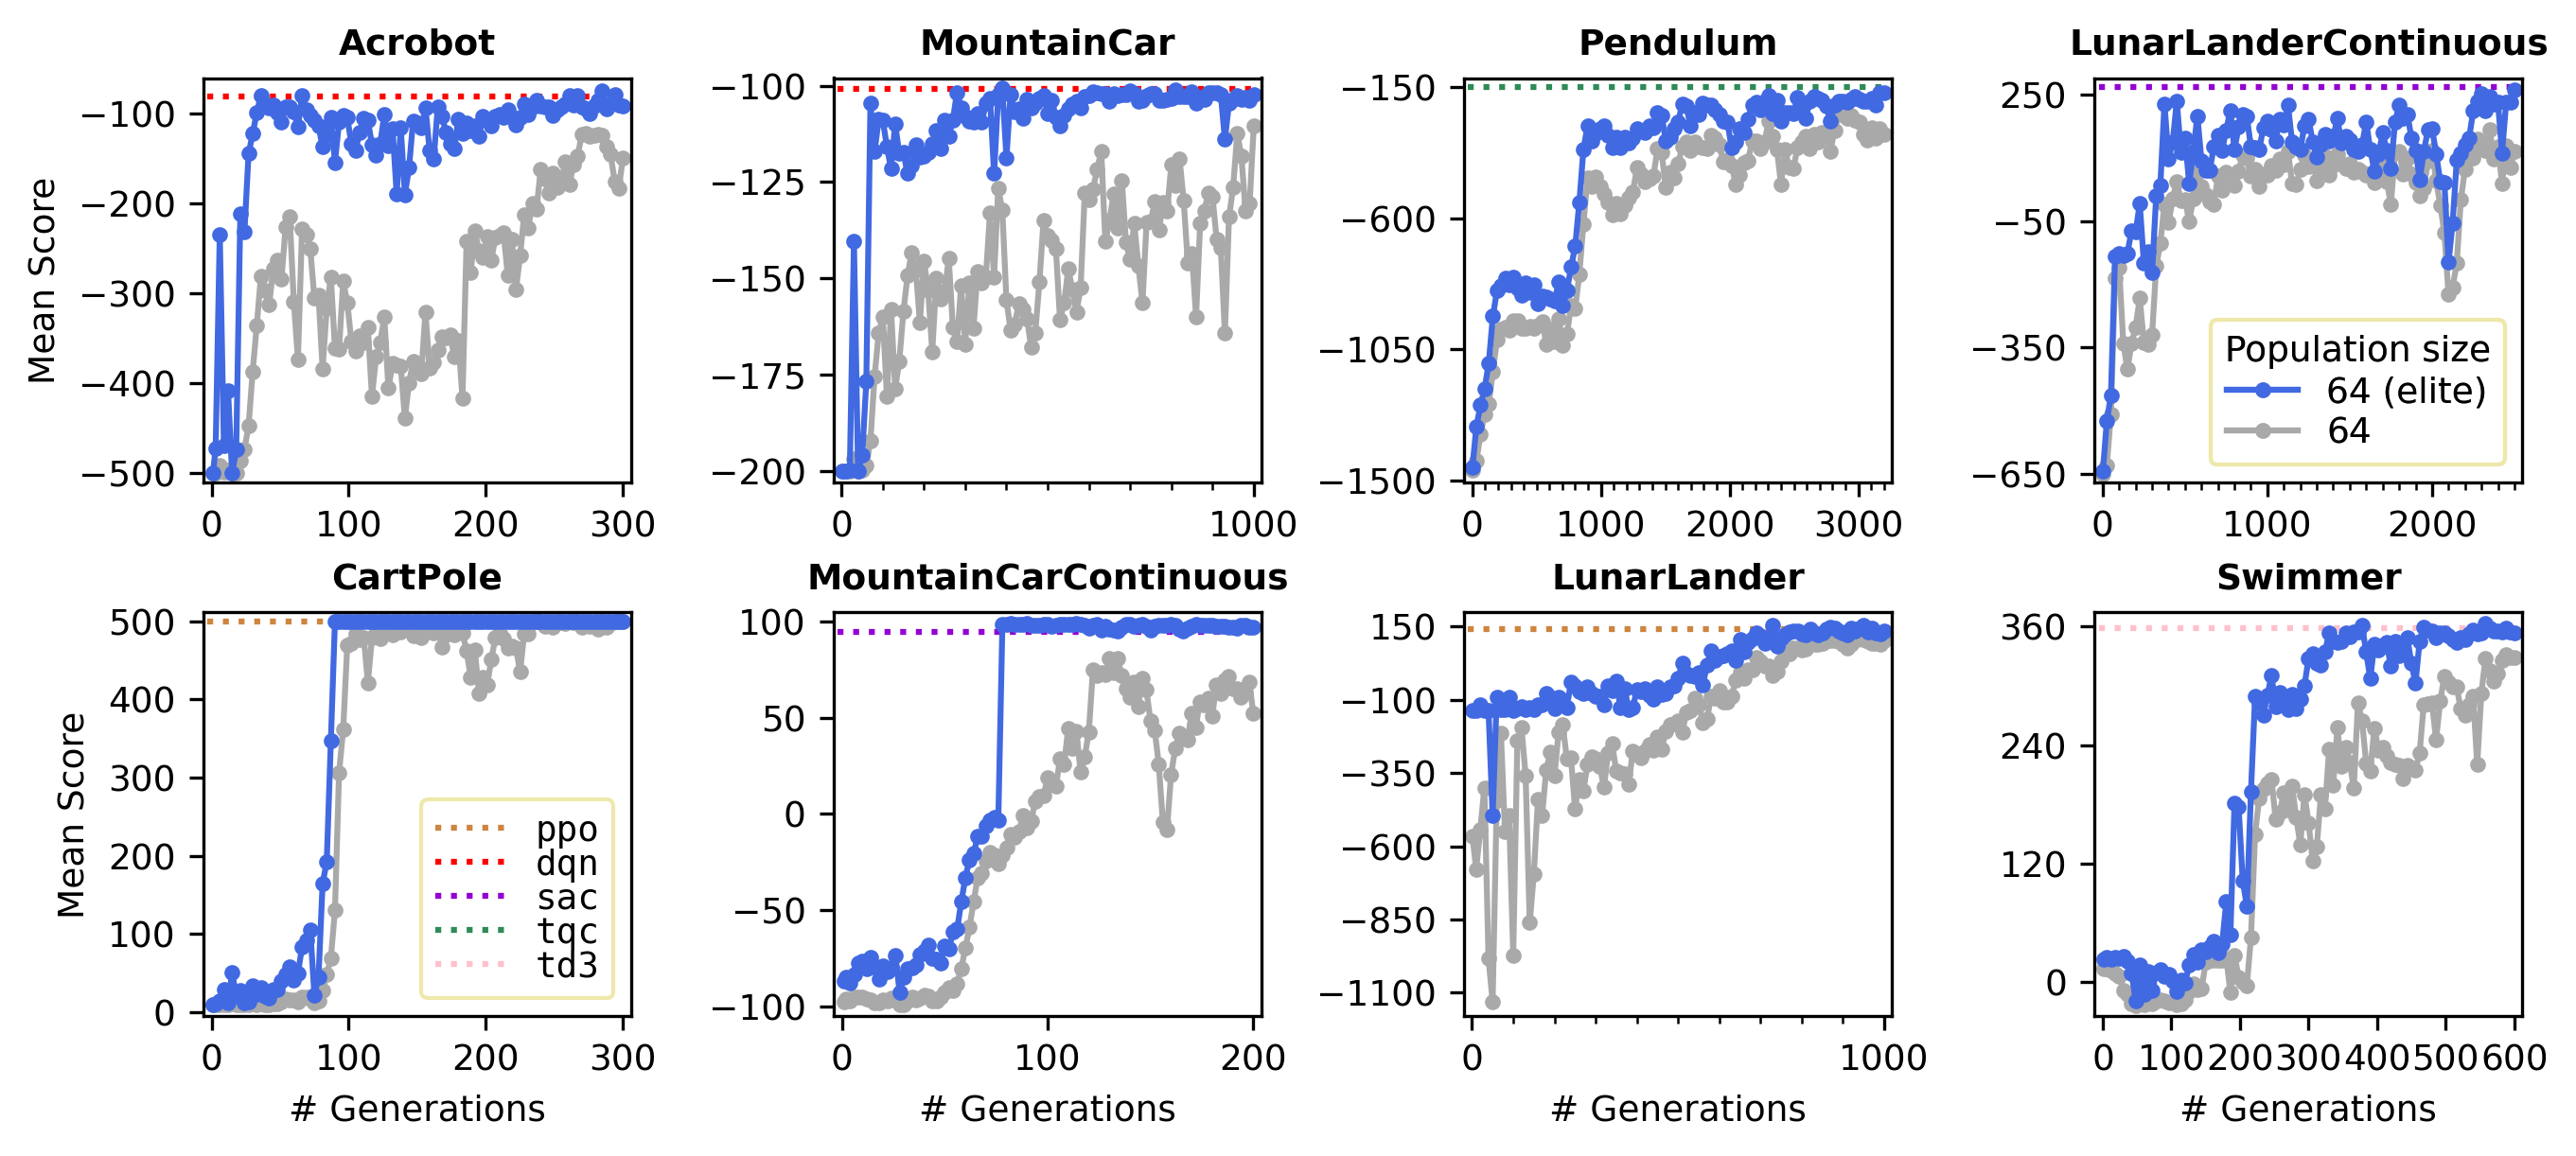

In [3]:
plt.rcParams["figure.figsize"] = [9, 4]
plot([['acrobot', 300, [-510, -60], [-500, -50, 100], {'dqn':-80.4}],
      ['cart_pole', 300, [-5, 512], [0, 500, 100], {'ppo':500.0, 'dqn':-580.4, 'sac':-680.4, 'tqc':-780.4, 'td3':-880.4}],
      ['mountain_car', 1000, [-203, -98], [-200, -100, 25], {'dqn':-100.8}],
      ['mountain_car_continuous', 200, [-105, 105], [-100, 100, 50], {'sac':94.6}],
      ['pendulum', 3200, [-1505, -120], [-1500, -150, 450], {'tqc':-150.6}],
      ['lunar_lander', 1000, [-1180, 200], [-1100, 150, 250], {'ppo':142.7}],
      ['lunar_lander_continuous', 2500, [-670, 290], [-650, 250, 300], {'sac':269.7}],
      ['swimmer', 600, [-35, 375], [0, 361, 120], {'td3':358.3}]])
plt.savefig("../../../data/states/envs.multistep.imitate.control/extra/figures/results1.pdf")

In [4]:
def plot(list):

    fig, axs = plt.subplots(2,4, dpi=300)

    for i in range(len(list)):
        
        task, nb_gens, ylims, yticks, sb3_agent = list[i]

        ### Set plot & variables

        axs[i%2][i//2].set_title(
            get_task_name(task)[:-3], fontdict = {'fontweight': 'bold'})

        if i in [1, 3, 5, 7]:
            axs[i%2][i//2].set_xlabel('# Timesteps')
        if i in [0, 1]:
            axs[i%2][i//2].set_ylabel("Score")

        if 'dqn' in sb3_agent:
            sb3_color = 'red'
        elif 'ppo' in sb3_agent:
            sb3_color = 'peru'
        elif 'sac' in sb3_agent:
            sb3_color = 'darkviolet'
        elif 'td3' in sb3_agent:
            sb3_color = 'pink'
        else: # 'tqc' in sb3_agent:
            sb3_color = 'seagreen'

        gens = [1, nb_gens//4, nb_gens//2, nb_gens//2+nb_gens//4, nb_gens]

        ### Load data

        # SB3
        path_0 = '../../../data/states/envs.multistep.imitate.control/extra/'
        path_0 += 'sb3_agent_rewards/' + task + '/rewards.pkl'

        with open(path_0, 'rb') as f:
            sb3_rewards_list = pickle.load(f)
            
        # NE
        path_1 = '../../../../../Videos/envs.multistep.imitate.control/'
        path_1 += 'merge.no~steps.0~task.' + task + '~transfer.no/'
        path_1 += 'bots.network.static.rnn.control/64/'

        ne_rewards_list_5_timepoints = []

        for gen in gens:
            with open(path_1 + str(gen) + '/rewards.pkl', 'rb') as f:
                ne_rewards_list_5_timepoints.append(pickle.load(f))

        ### Calculate run lengths

        run_lengths = np.zeros(6, dtype=np.int32)

        # SB3
        run_lengths[0] = len(sb3_rewards_list[0])

        # NE
        for k in range(5):
            run_lengths[k+1] = len(ne_rewards_list_5_timepoints[k][0])

        ### Fill Rewards Numpy Array

        rewards = np.zeros((6, run_lengths.max())) * np.nan

        # SB3
        rewards[0][:run_lengths[0]] = sb3_rewards_list[0]

        # NE
        for k in range(5):
            rewards[k+1][:run_lengths[k+1]] = \
                ne_rewards_list_5_timepoints[k][0]

        ### Calculate Cumulative Sums

        cum_sums = rewards.cumsum(axis=1)

        if run_lengths.max() >= 999:
            xticks = 1000
        else:
            xticks = 100

        axs[i%2][i//2].set_xticks(
            np.arange(0, run_lengths.max()+2, step=xticks))
        axs[i%2][i//2].set_yticks(
            np.arange(yticks[0], yticks[1]+1, step=yticks[2]))
        axs[i%2][i//2].set_xlim(
            [-run_lengths.max()//50,run_lengths.max()+run_lengths.max()//50])
        axs[i%2][i//2].set_ylim([ylims[0],ylims[1]])

        if task == 'cart_pole':

            cum_sums[1] -= 25
            cum_sums[2] -= 20
            cum_sums[3] -= 15
            cum_sums[4] -= 10
            cum_sums[5] -= 5

        if task == 'acrobot':

            cum_sums[1] -= 10
            cum_sums[2] -= 8
            cum_sums[3] -= 6
            cum_sums[4] -= 4
            cum_sums[5] -= 2

        if task == 'mountain_car':

            cum_sums[1] -= 5
            cum_sums[2] -= 4
            cum_sums[3] -= 3
            cum_sums[4] -= 2
            cum_sums[5] -= 1

        ne = []

        ne.append(axs[i%2][i//2].plot(
            np.arange(0, run_lengths.max()),
            cum_sums[1],
            '-', c='gainsboro', label='    0%')[0])

        ne.append(axs[i%2][i//2].plot(
            np.arange(0, run_lengths.max()),
            cum_sums[2],
            '-', c='silver', label='  25%')[0])

        ne.append(axs[i%2][i//2].plot(
            np.arange(0, run_lengths.max()),
            cum_sums[3],
            '-', c='darkgrey', label='  50%')[0])

        ne.append(axs[i%2][i//2].plot(
            np.arange(0, run_lengths.max()),
            cum_sums[4],
            '-', c='grey', label='  75%')[0])

        ne.append(axs[i%2][i//2].plot(
            np.arange(0, run_lengths.max()),
            cum_sums[5],
            '-', c='black', label='100%')[0])

        sb3 = []

        sb3.append(axs[i%2][i//2].plot(
            np.arange(0, run_lengths.max()),
            cum_sums[0],
            '-', c=sb3_color, label=sb3_agent)[0])

        if task in ['cart_pole']:

            if 'dqn' in sb3_agent:
                sb3_color = 'red'
            elif 'ppo' in sb3_agent:
                sb3_color = 'peru'
            elif 'sac' in sb3_agent:
                sb3_color = 'darkviolet'
            elif 'td3' in sb3_agent:
                sb3_color = 'pink'
            else: # 'tqc' in sb3_agent:
                sb3_color = 'seagreen'

            sb3.append(axs[i%2][i//2].plot(
                np.arange(0, 1),
                np.arange(0, 1),
                '-', c='red', label='dqn')[0])

            sb3.append(axs[i%2][i//2].plot(
                np.arange(0, 1),
                np.arange(0, 1),
                '-', c='darkviolet', label='sac')[0])

            sb3.append(axs[i%2][i//2].plot(
                np.arange(0, 1),
                np.arange(0, 1),
                '-', c='seagreen', label='tqc')[0])

            sb3.append(axs[i%2][i//2].plot(
                np.arange(0, 1),
                np.arange(0, 1),
                '-', c='pink', label='td3')[0])


            leg1 = axs[i%2][i//2].legend(handles=sb3, loc='lower right', edgecolor='palegoldenrod', labelspacing=0)
            leg1.get_frame().set_alpha(None)
            leg1.get_frame().set_facecolor((1, 1, 1, .45))
            axs[i%2][i//2].add_artist(leg1)

        if task == 'lunar_lander_continuous':
            leg2 = axs[i%2][i//2].legend(handles=ne, title='Generations', loc='lower right', edgecolor='palegoldenrod', labelspacing=0.1)
            leg2.get_frame().set_alpha(None)
            leg2.get_frame().set_facecolor((1, 1, 1, .45))
            axs[i%2][i//2].add_artist(leg2)

        axs[i%2][i//2].xaxis.set_minor_locator(MultipleLocator(100))

    fig.tight_layout(pad=0.5)

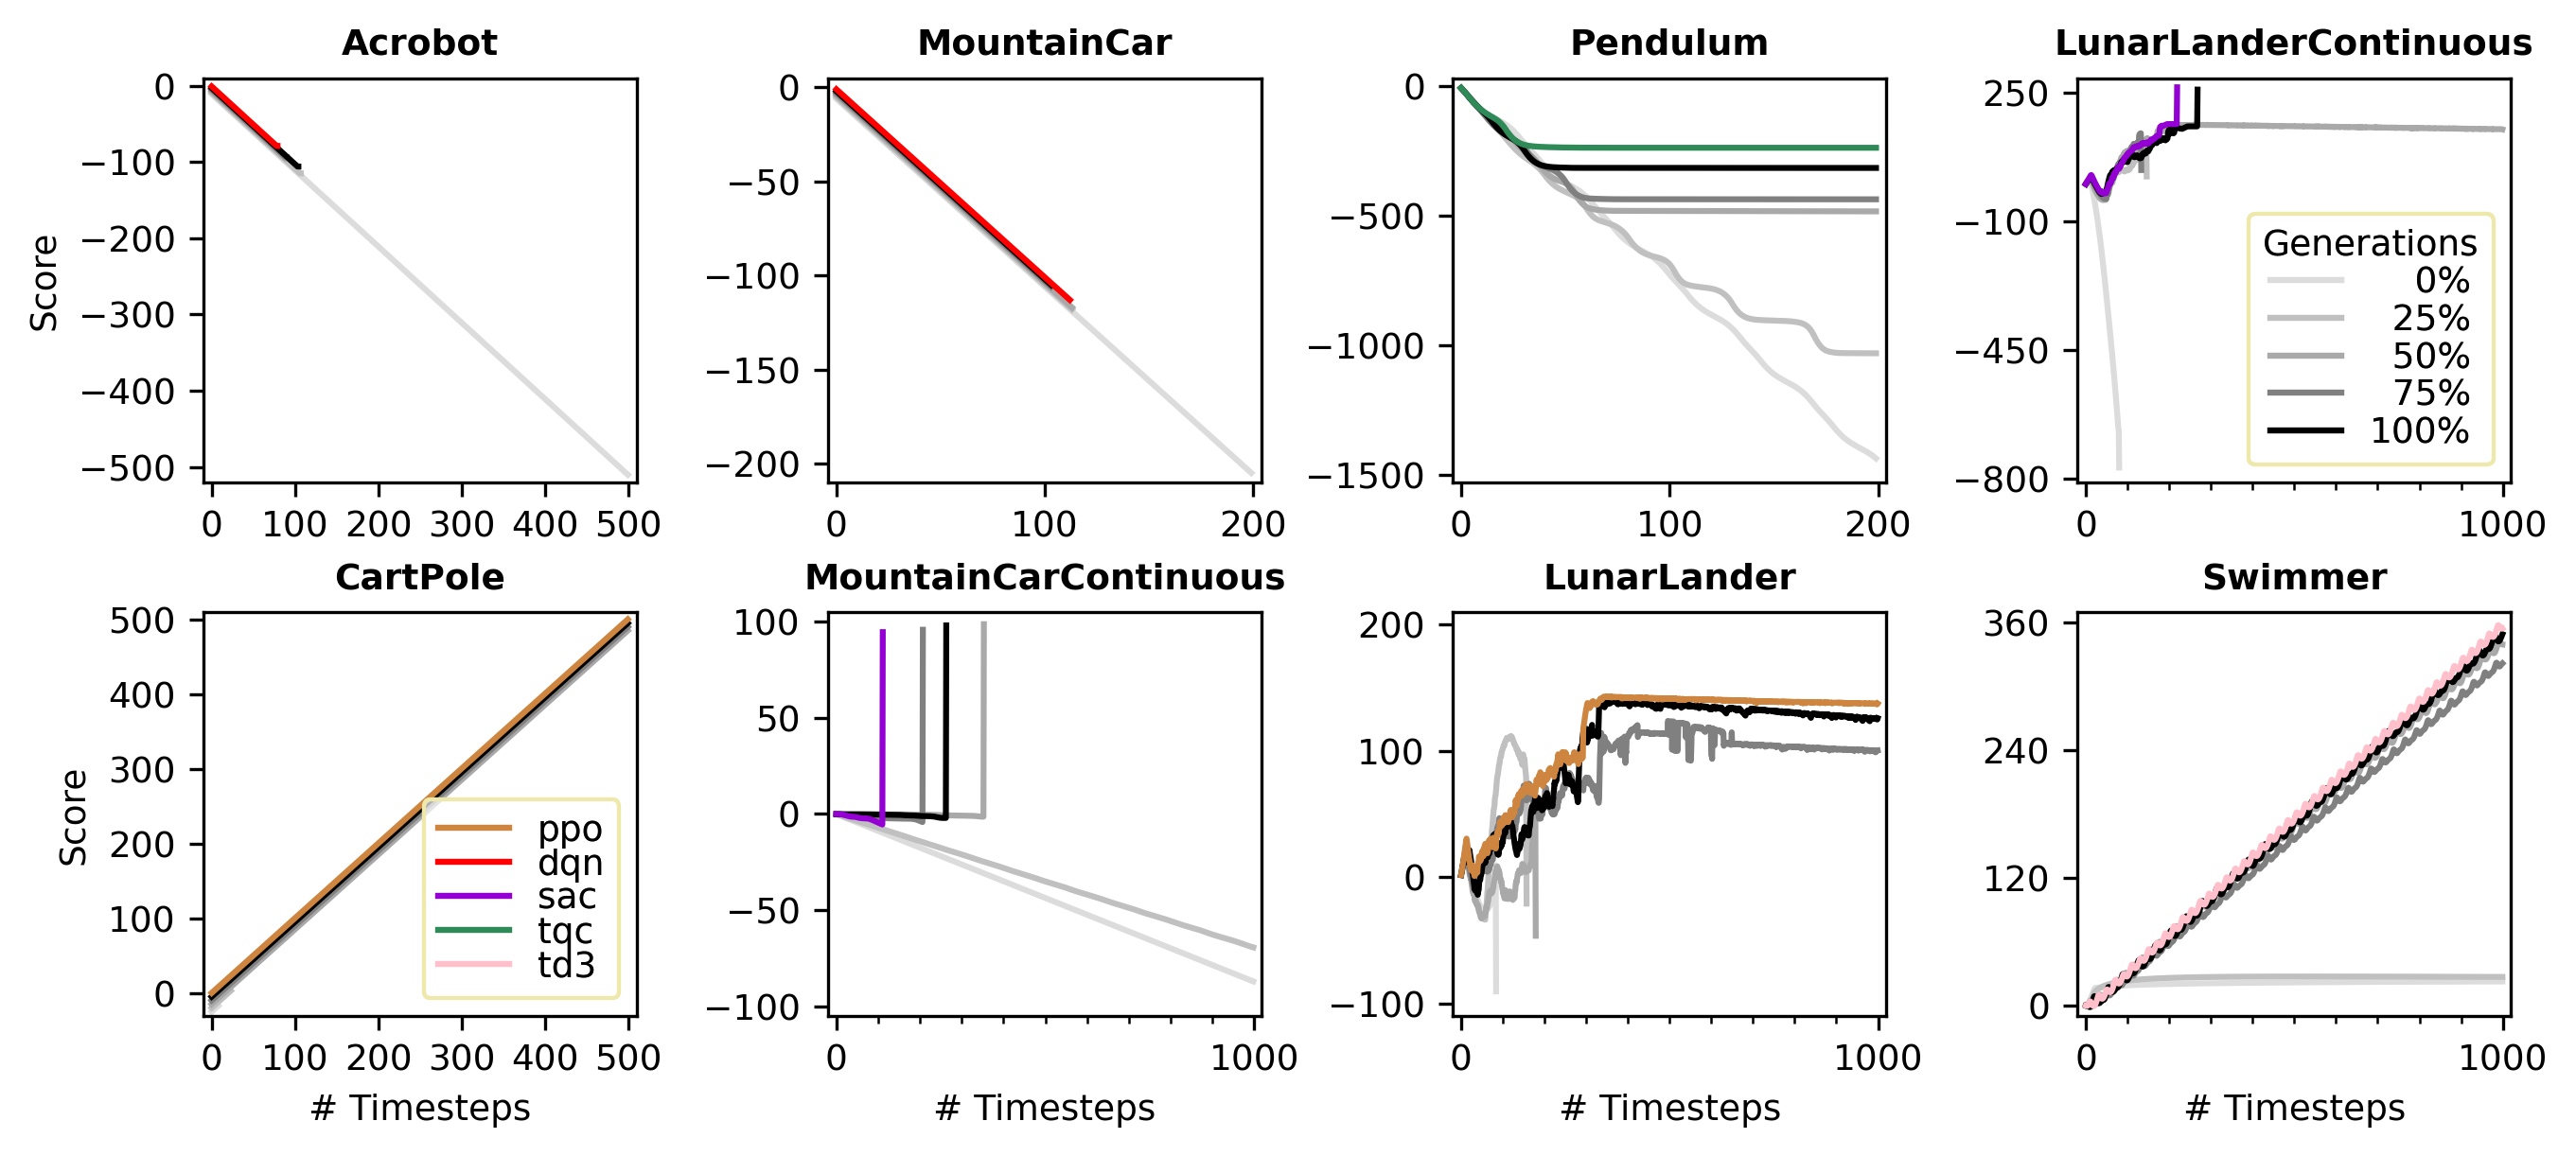

In [7]:
plt.rcParams["figure.figsize"] = [9, 4]
plot([['acrobot', 300, [-520, 10], [-500, 50, 100], 'dqn'],
      ['cart_pole', 300, [-30, 510], [0, 500, 100], 'ppo'],
      ['mountain_car', 1000, [-210, 5], [-200, 0, 50], 'dqn'],
      ['mountain_car_continuous', 200, [-105, 105], [-100, 100, 50], 'sac'],
      ['pendulum', 3200, [-1530, 30], [-1500, 0, 500], 'tqc'],
      ['lunar_lander', 1000, [-110, 210], [-100, 200, 100], 'ppo'],
      ['lunar_lander_continuous', 2500, [-810, 290], [-800, 250, 350], 'sac'],
      ['swimmer', 600, [-10, 370], [0, 361, 120], 'td3']])
plt.savefig("../../../data/states/envs.multistep.imitate.control/extra/figures/results2.pdf")